In [86]:
import networkx as nx
import random as rng
import numpy as np
import matplotlib.pyplot as plt

In [87]:
class Ant:
    
    def __init__(self,position):
        self.pos = position

    path = []

    def move(self, weighted_edges):
        paths = list(filter(lambda edge: edge[0] == self.pos or edge[1] == self.pos, dict(weighted_edges)))
        path_weights = (weighted_edges[i] for i in paths)
        path = rng.choices(paths, path_weights)[0]
        while (path == path[-1] and path != (colony, food) and path != (food,colony)):
            path = rng.choices(paths, path_weights)[0]
        self.pos = path[0] if path[0] != self.pos else path[1]
        self.path.append(path)

In [88]:
n = 5 # number of nodes
max_coord_size = 100

g = nx.complete_graph(n)

coords = {}

for i in g.nodes():
    coords[i] = (rng.uniform(0,max_coord_size),rng.uniform(0,max_coord_size))

a = rng.sample(list(g.nodes()),2)

colony = a[0]
food = a[1]


weighted_edges = {}

for i in g.edges():
    weighted_edges[i] = 1

distance_edges = {}

for i in g.edges():
    distance_edges[i] = np.sqrt(((coords[i[1]])[0]-coords[i[0]][0])**2 + ((coords[i[1]])[1]-coords[i[0]][1])**2)

def dist(arr):
    dist = 0
    for i in arr:
        dist += distance_edges[i]
    
    return dist

In [89]:
for i in g.edges():
    weighted_edges[i] = 1

ant = Ant(colony)

K = 1 # pheremone amount
V = 0.3 # evaporation rate (scales down pheremone amount by (1-V)*pheremone)

ant_num = 5 # number of ants per iteration
iteration_count = 10 # number of iterations 

paths = []

pos_str =str(colony) + ""

for i in range(0,iteration_count):
    
    paths = []

    for i in range(0,ant_num):
        ant.path = []
        has_food = False

        while has_food == False:
            ant.move(weighted_edges)
            pos_str += str(ant.pos)
            if ant.pos == food:
                has_food = True
        
        while has_food == True:
            ant.move(weighted_edges)
            pos_str += str(ant.pos)
            if ant.pos == colony:
                has_food = False

        
        paths.append(ant.path)

    for i in weighted_edges: # evaporate pheremones
        weighted_edges[i] = (1-V)*weighted_edges[i]
    
    for i in paths: # add pheremones from ants
        for j in i:
            weighted_edges[j] += K/distance_edges[j]

max pheremone: 3.860817719073628
last 20 positions of ant: 3421042424242404313


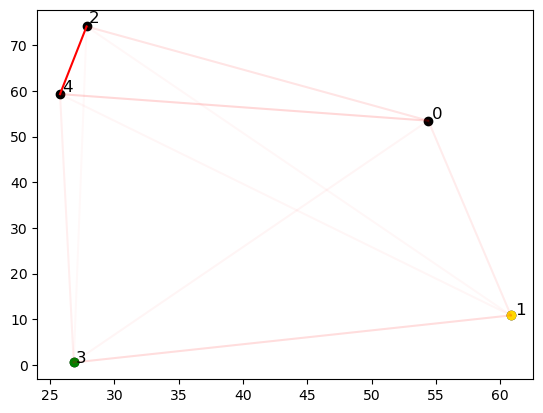

In [90]:
max_weight = max(list(weighted_edges.values()))
print("max pheremone: " + str(max_weight))
print("last 20 positions of ant: " + pos_str[-20:-1:1])

x =[]
for i in coords.values():
    x.append(i[0])


y =[]
for i in coords.values():
    y.append(i[1])

plt.scatter(x,y, color='black')
plt.scatter(coords[colony][0],coords[colony][1], color='gold')
plt.scatter(coords[food][0],coords[food][1], color='green')

for i in range(0,len(x)):
    plt.text(x[i] * (1 + 0.005), y[i] * (1 + 0.01) , i, fontsize=12)

for i in range(0,len(x)):
    for j in range(i+1,len(y)):
        plt.plot([x[i],x[j]], [y[i], y[j]], color='r', alpha = weighted_edges[(i,j)]/max_weight)
